<a href="https://colab.research.google.com/github/RodYazdan/sales_predictions/blob/master/Hirad_Yazdankhah_Project_1_FINAL_Part_6_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project1 - (NOTE : FINAL - PART 6 on REGRESSION IS IN SECTION BELOW)
#Hirad Yazdankhah
#June 29 2022

## 0-Importing Data

In [67]:
import numpy as np
import pandas as pd
food_filename = '/content/sales_predictions.csv'
sales_data_predictions =pd.read_csv(food_filename)
sd=sales_data_predictions
sd.head()
# Note sd is used for Sales Data manipulation in 1st month of course
# df is used for the machine learning part to ensure we start with a fresh data and 
# avoid and leakage
df=sd.copy()

##1) How many rows and columns?

In [68]:
sd.shape

(8523, 12)

##2) What are the datatypes of each variable?

In [69]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##3) Are there duplicates? If so, drop any duplicates.

In [70]:
sd.duplicated().sum()
#sd[sd.duplicated(keep=False)] ===>used to remove duplicates if there were duplicates

0

>No there are no duplicates !

##4) Identify missing values.

In [71]:
sd.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [72]:
missing_vals = sd.isna().sum()
missing_vals[missing_vals>0]
sd['Item_Weight'].fillna(value=sd['Item_Weight'].mean(),inplace=True)
sd = sd.drop(columns=['Outlet_Size'])
sd.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


There are 8523 rows in total. From theses 1463 values are missing numerical values for weight and 2410 categories ( ex: medium,high etc) for Outlet size . Since there is still a significant number of rows that have valuable information I have decided replace the values of the numerical missing data with the average . However almost 30 % of the Outlet size data is missing so I have decided to delete that coulumns.

##6) Confirm that there are no missing values after addressing them.

In [73]:
#missing_vals = sd.isna().sum()
#missing_vals[missing_vals>0]
sd.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [74]:
sd.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600000    LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Tier 2                Supermarket Type1  992.7078             1
FDV28            12.857645    Regular           0.158955         Frozen Foods           34.9558   OUT027             1985                       Tier 3                Supermarket Type3  1120.5414            1
FDV32            7.785000     Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       Tier 2                Supermarket Type1  1328.2710            1
                                                0.089070         Fruits and Vegetables  62.7510   OUT018             2009                       Tier 3                Superma

In [75]:
sd['Item_Fat_Content'] = sd['Item_Fat_Content'].replace('LF', 'Low Fat')
sd.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600000    Low Fat           0.000000         Soft Drinks            141.6154  OUT045             2002                       Tier 2                Supermarket Type1  3829.0158            1
FDV28            12.857645    Regular           0.158955         Frozen Foods           34.9558   OUT027             1985                       Tier 3                Supermarket Type3  1120.5414            1
FDV32            7.785000     Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       Tier 2                Supermarket Type1  1328.2710            1
                                                0.089070         Fruits and Vegetables  62.7510   OUT018             2009                       Tier 3                Superma

In [76]:
sd['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [77]:
sd['Item_Fat_Content'] = sd['Item_Fat_Content'].replace('reg', 'Regular')
sd['Item_Fat_Content'] = sd['Item_Fat_Content'].replace('low fat', 'Low Fat')
sd['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##8) For any numerical columns, obtain the summary statistics of each (min, max, mean)


In [78]:
sd.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


#====================================================================
#Project1 - Part 3 - Plotting
#Hirad Yazdankhah
#June 9 2022
#====================================================================

# 1- Histogram to view the distributions of various features in your dataset.

In [79]:
import pandas as pd
# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1A) Histogram of Number of Items Sold vs. Type of Of item Sold

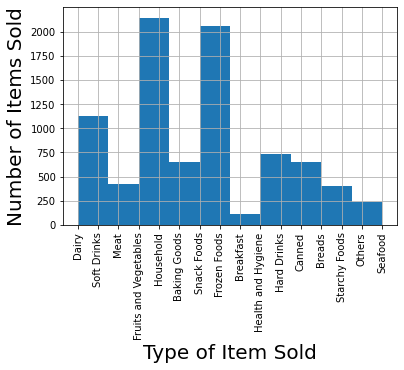

In [80]:
sd['Item_Type'].hist()
plt.xticks(rotation = 90)
plt.xlabel('Type of Item Sold', fontsize = 20);
plt.ylabel('Number of Items Sold', fontsize = 20);
#plt.legend(['Percentage of Cat Owners','Percentage of Dog Owners'])

## 1B) Histogram of Number of Items Sold vs. Item's Fat Content

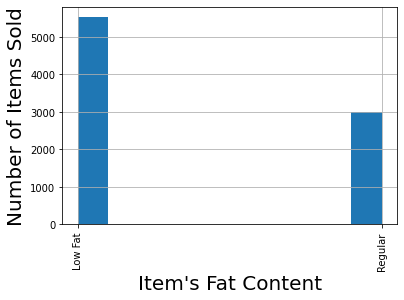

In [81]:
sd['Item_Fat_Content'].hist()
plt.xticks(rotation = 90)
plt.xlabel("Item's Fat Content", fontsize = 20);
plt.ylabel('Number of Items Sold', fontsize = 20);
#plt.legend(['Percentage of Cat Owners','Percentage of Dog Owners'])

# 2- Boxplot to view statistical summaries of various features in your dataset.

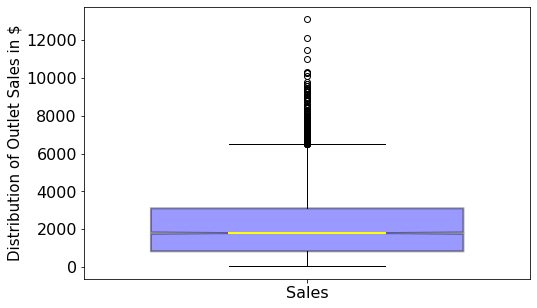

In [82]:
sales= sd['Item_Outlet_Sales'] 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))

boxplots = axes.boxplot([sales],
           notch = True,
           labels=['Sales'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# Label formats for plot
boxplot1 = boxplots['boxes'][0]
#boxplot1.set_facecolor('orange')
#plt.xlabel('Animals', fontsize = 20);
plt.ylabel('Distribution of Outlet Sales in $', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

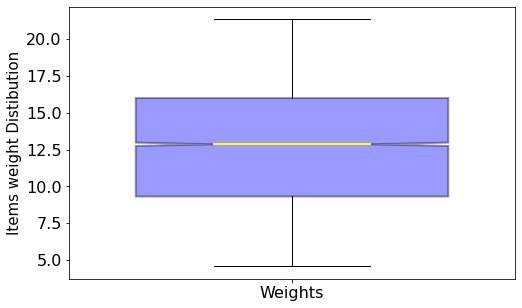

In [83]:
sales= sd['Item_Weight'] 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))

boxplots = axes.boxplot([sales],
           notch = True,
           labels=['Weights'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# Label formats for plot
boxplot1 = boxplots['boxes'][0]
plt.ylabel('Items weight Distibution', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

#3-Heatmap of the correlation between features.

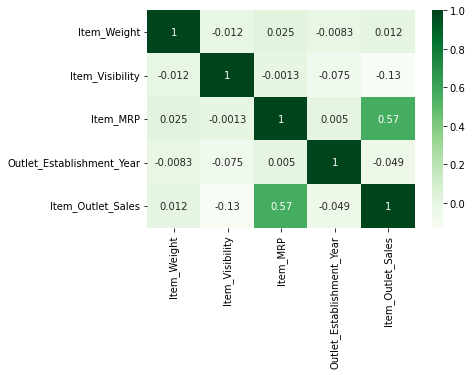

In [84]:
corr = sd.corr()
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens', annot = True)

#====================================================================
#Project1 - Part 4 - Data Visualizations 
#Hirad Yazdankhah
#June 16 2022
#====================================================================

### INSTRUCTIONS :Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

In [85]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


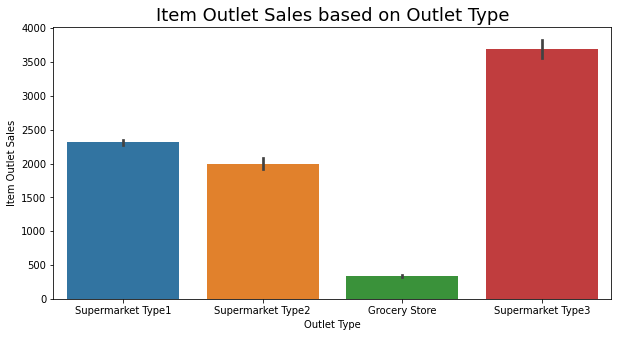

In [86]:
plt.figure(figsize = (10,5))
sns.barplot(data=sd, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Item Outlet Sales based on Outlet Type', fontsize = 18)
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales');
# EXPLANATION: The plot below shows that Supermarket type 3 have much more sale Than Type 1 or 2 , 
# and that Grocery stores have significanly less sales. I tis surprising that Supermarket type 2 ha sless sales than Type 1 though.

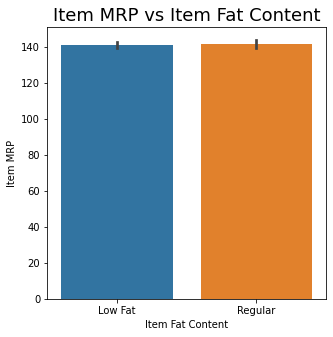

In [87]:
plt.figure(figsize = (5,5))
sns.barplot(data=sd, x='Item_Fat_Content', y='Item_MRP')
plt.title('Item MRP vs Item Fat Content', fontsize = 18)
plt.xlabel('Item Fat Content')
plt.ylabel('Item MRP');
# plt.legend();
# EXPLANATION : Maximum retail price (MRP) is a manufacturer calculated price that is the highest price that can be charged for a product
# The plot below shows that Low fat and regular fat items in general cost about the same so it is not more expensive to eat healthy.

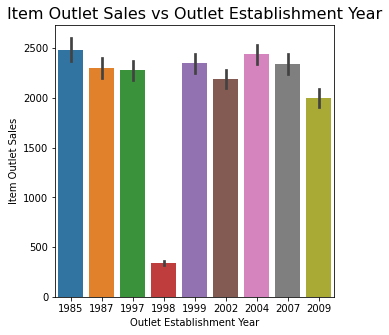

In [88]:
plt.figure(figsize = (5,5))
sns.barplot(data=sd, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
plt.title('Item Outlet Sales vs Outlet Establishment Year', fontsize = 16)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales');
#EXPLANATION : The plot below shows that for the most part ( other than 1998 established stores) how long an store has been open does not have anything to to with the amount of sales it has
# for example I would have thought that older store are better known and may have more sales. 

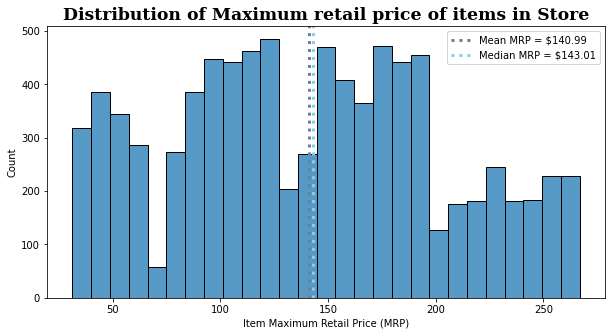

In [89]:
## Paste our visualization code, but use string formatting instead of rounding

## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=sd, x='Item_MRP', ax=ax)

ax.set_title('Distribution of Maximum retail price of items in Store', 
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');

## Annotate mean and median
mean_price = sd['Item_MRP'].mean()
ax.axvline(mean_price, color='slategray', ls=':', lw=3,
           label=f'Mean MRP = ${mean_price:,.2f}');

med_price = sd['Item_MRP'].median()
ax.axvline(med_price, color='skyblue', ls=':', lw=3,
           label=f'Median MRP = ${med_price:,.2f}');
plt.xlabel('Item Maximum Retail Price (MRP)')
ax.legend();

#EXPLANTAION: The stores keep less count of the more expensive items (Over $200) compared to the cheap items.
# The items they keep most of in their inventory are the medium priced items les than $200 

#============================================================
#Project1 - Part 5 - Machine Learning
#Hirad Yazdankhah
#June 16 2022
#============================================================

### 0-Importing Libraries

In [90]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [91]:
# I drop Item_Identifier, Outlet_Identifier,Outlet_Establishment_Year becasue these are irrevlant to the ML task
df = df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           6113 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [92]:
df.duplicated().sum()
#sd[sd.duplicated(keep=False)] ===>used to remove duplicates if there were duplicates

0

In [93]:
# check for missing data
# note there are no missing data in the the "Item OUtlet Sales" so we do not need to delte any rows at this point
df.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           6113 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


# Task 1- dentify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix. 

In [95]:
#Validation Split
# Assign the target column to y
y = df['Item_Outlet_Sales']
# Assign the features to X (In this case we include all columns except the target column)
X = df.drop(columns = 'Item_Outlet_Sales')

# Task 2 - Perform a train test split

In [96]:
# Train test split . WE reserve 30% of data for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

# Task 3- Create a preprocessing object to prepare the dataset for Machine Learning

In [97]:
# We see there are no inconsistencies in the categorical data :
# df['Manufacturer'].value_counts()

In [98]:
# Coumn Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [99]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [100]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [101]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [102]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f723443fe50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f723443fb50>)])

In [103]:
#Transformer Data
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f723443fe50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f723443fb50>)])

In [104]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [105]:
#Inspect the Results

# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (5966, 34)




array([[-1.23795688,  1.6066808 , -0.40189546, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.61657069, -1.00844167, -0.61928426, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , -0.22706823, -0.20253536, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.1064099 , -0.91757329,  1.5257291 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.75894114, -0.22428724, -0.3811361 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.80980479, -0.95575131, -0.73573148, ...,  1.        ,
         0.        ,  0.        ]])

In [106]:
#============================================================
#Project1 - Part 6 ( FINAL ) - Regression
#Hirad Yazdankhah
#June 16 2022
#============================================================

#1) Your first task is to build a linear regression model to predict sales.

##Initialization

In [107]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           6113 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [109]:
X_train= X_train_processed
X_test= X_test_processed

## 1A)Build a linear regression model. 

In [110]:
# Step 1: Import the and instantiate the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [111]:
#Step 2: Create a modeling pipeline
from sklearn.pipeline import make_pipeline
lin_reg_pipe = make_pipeline(lin_reg)

In [112]:
#Step 3: Train the model on your training data.Fit Pipeline
lin_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [113]:
#Create Model Predictions for Training and Testing Data
train_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict (X_test)

## 1B)Compare the performance of your model based on r^2.

In [114]:
# Calculating R2
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef (y_test, test_pred)[0][1]**2
print (f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.5599739999886811
Model Testing R2: 0.5675036650670386



## 1C)Compare the performance of your model based on rmse.

In [115]:
# Calculating RMSE
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))
print (f'Model Training RMSE: {train_RMSE}')
print (f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 1140.7664761052592
Model Testing RMSE: 1101.8669263706163


#2) Your second task is to build a regression tree model to predict sales.

##2A) Build a simple regression tree model.

#RANDOM FOREST APPROACH

In [116]:
# Step 1: Import the model you want to use
# Import random forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [117]:
#Step 2: Make an instance of the Model
#==============================================================
rf = RandomForestRegressor(random_state = 42)
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [118]:
#Step 3: Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y. 
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [119]:
#Step 4: Predict the values for y 
#This step just allows you to see the actual predictions, 
# but is not necessary for evaluating or tuning your model)
rf.predict(X_test)

array([ 792.302   ,  967.14108 ,  464.675136, ...,  553.785808,
       1774.78977 , 4978.326418])

In [120]:
#Step 5: Evaluate your model performance
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9372160397870377
0.5457851780435301


In [121]:
#Step 6: Tune your model
# Tuning the max_depth
# As we did previously, we can tune the max_depth we allow for each tree in our random forest.  
#To see what the depth of each tree in your random forest was when the max_depth was unlimited

rf_9 = RandomForestRegressor(max_depth = 9, random_state = 42)
rf_9.fit(X_train, y_train)
rf_9_train_score = rf_9.score(X_train, y_train)
rf_9_test_score = rf_9.score(X_test, y_test)
print(rf_9_train_score)
print(rf_9_test_score)

est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

0.6928976353674319
0.5917019340578819


44

In [122]:
 # We now try different values for max_depth or other parameters to see if you can make improvements to the default model. 
# Note random forest models are slow to train so this may take some time.
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

In [123]:
 scores.head()

,Test Score,Train Score
1,0.249582,0.255405
2,0.468668,0.466862
3,0.547884,0.545078
4,0.595382,0.597510
5,0.602196,0.611306


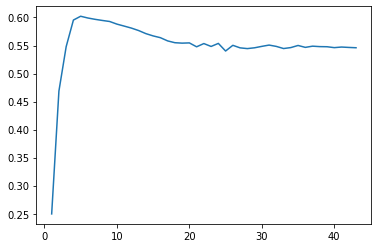

In [124]:
plt.plot(scores['Test Score'])

In [125]:
#We can also sort our scores dataframe by the test score to see which depth was best.
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.602196,0.611306
6,0.599038,0.625798
7,0.596673,0.644166
4,0.595382,0.597510
8,0.59467,0.667214


In [126]:
#Tuning n_estimators (# of decision trees)
# Another tuning parameter is n_estimators, which represents the number of trees that should be grown. 
# The code below can take some time to run. The reason is that when you train an ensemble you are training more than one model
# (in this case tree).  
#Let's see if we can improve our score by tuning the number of estimators. 
#=========================================================
# We choose a couple of values for n_estimators to save time
# We can use another loop later to narrow down the best number
# by trying numbers close to the best one
n_ests = [50, 100, 150, 200, 250,300, 350]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=29, n_estimators=n)
   model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
50,0.552089,0.934543
100,0.545313,0.936658
150,0.552204,0.936419
200,0.55044,0.937183
250,0.549961,0.936963


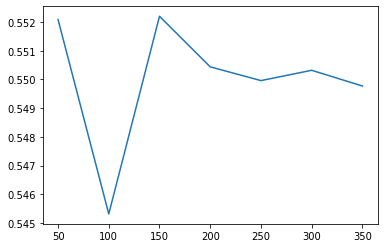

In [127]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [128]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()
# Notice that, in this case, we did not have any  improvement by tuning the number of estimators.

,Test Score,Train Score
150,0.552204,0.936419
50,0.552089,0.934543
200,0.55044,0.937183
300,0.55032,0.937613
250,0.549961,0.936963


In [129]:
# Create Model Predictions for Training and Testing Data
# Note since our last run model was Random forest we already have X-train and X- Test.
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

## 2B)Compare the performance of your model based on r^2.

In [130]:
# Calculating R2
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef (y_test, test_pred)[0][1]**2
print (f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.9459499007697441
Model Testing R2: 0.5581937612210199


## 2C) Evaluate the performance of your model based on rmse.

In [131]:
# Calculating RMSE
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))
print (f'Model Training RMSE: {train_RMSE}')
print (f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 430.90539327118023
Model Testing RMSE: 1127.941831980576


# 3) You now have tried 2 different models on your data set. You need to determine which model to implement.

### Overall, which model do you recommend?
### Justify your recommendation.

In [132]:
# SUMMARY OF RESULTS: 
#------------------------
# LINEAR REGRESSION
#------------------------

#R2 SCORES
#Model Training R2: 0.5599739999886811
#Model Testing R2: 0.5675036650670386

#RMSC SCORES
#Model Training RMSE: 1140.7664761052592
#Model Testing RMSE: 1101.8669263706163

#------------------------
# RANDOM FOREST
#------------------------
#R2 SCORES
#Model Training R2: 0.9459499007697441
#Model Testing R2: 0.5581937612210199

#RMSC SCORES
#Model Training RMSE: 430.90539327118023
#Model Testing RMSE: 1127.941831980576

## Based  the above result I recommend the Random forrest since it has a 